# Objective:
#### Remove Trend and Seasonality with statmodels
### statmodels
1. Dicky-Fuller Test for Stationarity: 
2. Decompose Time-Series to see Individual Components: 
3. Checking Whether Time-Series is Stationary or Not: 
  - moving window functioins to check mean, var, auto-covar: 
4. Remove Trend
 - log transformation: 
 - power transformation: 
 - Applying Moving Window Functions: 

 - Applying Moving Window Function on Log Transformed Time-Series: 
 - Applying Moving Window Function on Power Transformed Time-Series: 
 - Applying Linear Regression to Remove Trend: 

5. Remove Seasonality
 - differencing: 
 - Differencing Over Log Transformed Time-Series: 
 - Differencing Over Power Transformed Time-Series: 
 - Differencing Over Time-Series with Rolling Mean taken over 12 Months: 
 - Differencing Over Log Transformed & Mean Rolled Time-Series: 
 - Differencing Over Power Transformed & Mean Rolled Time-Series: 
 - Differencing Over Linear Regression Transformed Time-Series: 

# To Do:
1. Create Global Function for Seasonality and Trend Removal (Done)
2. Document Objective (Done)


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
air_passengers = pd.read_csv('./datasets/AirPassengers.csv', index_col=0, parse_dates = True)
air_passengers.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


<AxesSubplot:xlabel='Month'>

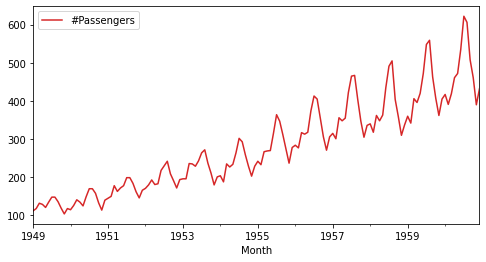

In [3]:
air_passengers.plot(figsize=(8,4),color='tab:red')

<AxesSubplot:xlabel='Month'>

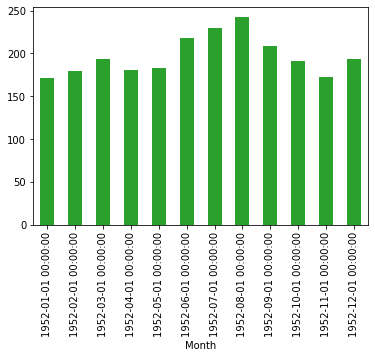

In [4]:
air_passengers['1952'].plot(kind='bar', color='tab:green', legend=False)

# Decompose Time-Series to see Individual Components 

In [5]:
from statsmodels.tsa.seasonal import seasonal_decompose

c:\users\malco\appdata\local\programs\python\python36\lib\site-packages\scipy\signal\signaltools.py:491: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return x[reverse].conj()


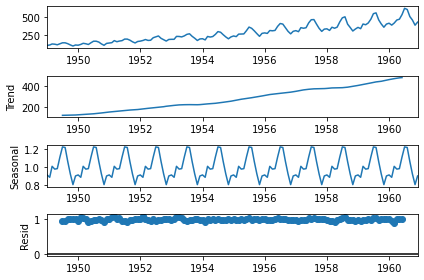

In [6]:
decompose_result=seasonal_decompose(air_passengers, model='multiplicative')
trend = decompose_result.trend
seasonal = decompose_result.seasonal
residual = decompose_result.resid
decompose_result.plot();

# 6. Checking Whether Time-Series is Stationary or Not 


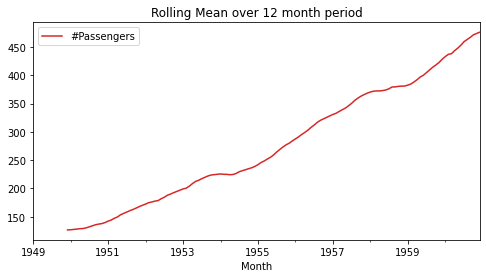

In [7]:
air_passengers.rolling(window = 12).mean().plot(figsize=(8,4), color="tab:red", title="Rolling Mean over 12 month period");

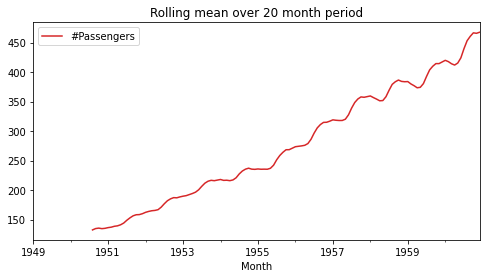

In [8]:
air_passengers.rolling(window = 20).mean().plot(figsize=(8,4), color="tab:red", title="Rolling mean over 20 month period");

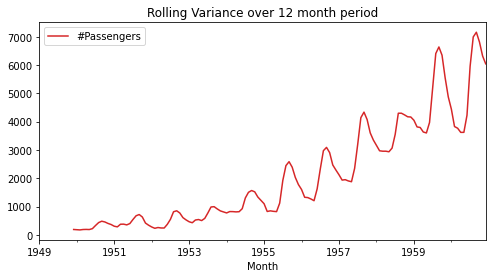

In [9]:
air_passengers.rolling(window = 12).var().plot(figsize=(8,4), color="tab:red", title="Rolling Variance over 12 month period");

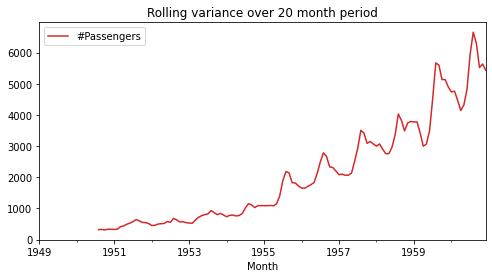

In [10]:
air_passengers.rolling(window = 20).var().plot(figsize=(8,4), color="tab:red", title="Rolling variance over 20 month period");

- time-series has some-kind of multiplicative effect
- low seasonality effect in the beginning which is amplifying over time.

# plotting auto-correlation

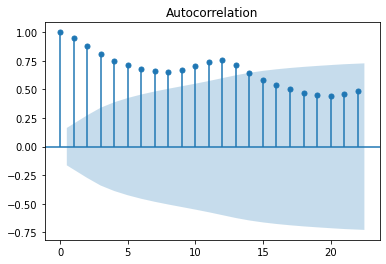

In [11]:
# understand whether present values of time-series are positively correlated, negatively correlated or not related at all with past values.
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(air_passengers);


- after 13 lags, the line gets inside confidence interval (light blue area). This can be due to seasonality of 12-13 months in our data.

# Testing with Dicky-Fuller


- test the stationarity of our time-series with this functionality and try to interpret its results to better understand it.

In [12]:
from statsmodels.tsa.stattools import adfuller
dftest = adfuller(air_passengers['#Passengers'], autolag = 'AIC')
dftest

print("1. ADF : ",dftest[0])
print("2. P-Value : ", dftest[1])
print("3. Num Of Lags : ", dftest[2])
print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])
print("5. Critical Values :")
for key, val in dftest[4].items():
    print("\t",key, ": ", val)

1. ADF :  0.8153688792060568
2. P-Value :  0.9918802434376411
3. Num Of Lags :  13
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 130
5. Critical Values :
	 1% :  -3.4816817173418295
	 5% :  -2.8840418343195267
	 10% :  -2.578770059171598


- p-value > 0.05 - This implies that time-series is non-stationary.
- p-value <=0.05 - This implies that time-series is stationary.
#### p-value is greater than 0.05 hence our time-series is not stationary. 

# 7. Remove Trend 
- differencing, 
- power transformation, 
- log transformation,

#### Logged Transformation

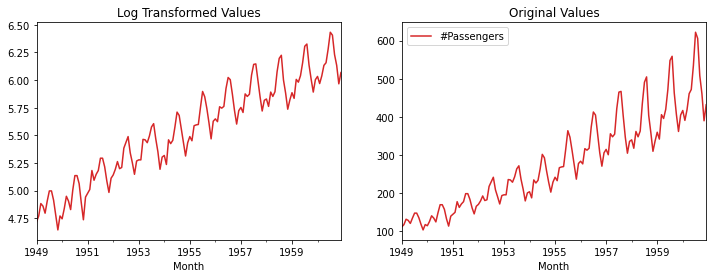

In [13]:
# log of each individual value of time-series data.
logged_passengers=air_passengers['#Passengers'].apply(lambda x: np.log(x))

ax1 = plt.subplot(121)
logged_passengers.plot(figsize=(12,4) ,color="tab:red", title="Log Transformed Values", ax=ax1);
ax2 = plt.subplot(122)
air_passengers.plot(color="tab:red", title="Original Values", ax=ax2);

- first chart, we can see that we have reduced the variance of time-series data. We can look at y-values of original time-series data and log-transformed time-series data to conclude that the variance of time-series is reduced.
- check whether we are successful or not by checking individual components of time-series by decomposing it as we had done above.

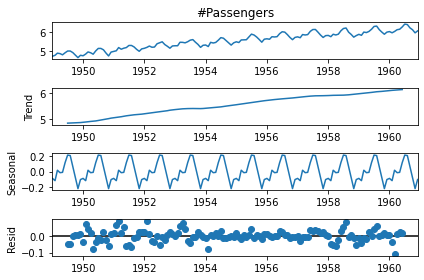

In [14]:
decompose_result = seasonal_decompose(logged_passengers)
decompose_result.plot();

# Power Transformations

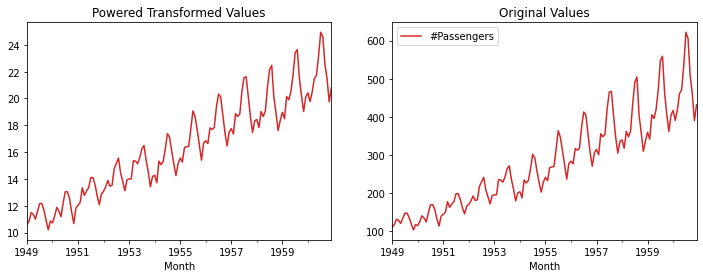

In [15]:
# apply power transformation in data same way as that of log transformation to remove trend.
powered_passengers = air_passengers["#Passengers"].apply(lambda x : x ** 0.5)

ax1 = plt.subplot(121)
powered_passengers.plot(figsize=(12,4), color="tab:red", title="Powered Transformed Values", ax=ax1);
ax2 = plt.subplot(122)
air_passengers.plot(figsize=(12,4), color="tab:red", title="Original Values", ax=ax2);

- we can see that we have reduced the variance of time-series data. We can look at y-values of original time-series data and power-transformed time-series data to conclude that the variance of time-series is reduced.

- We can check whether we are successful or not by checking individual components of time-series by decomposing it as we had done above.

### Applying Moving Window Functions


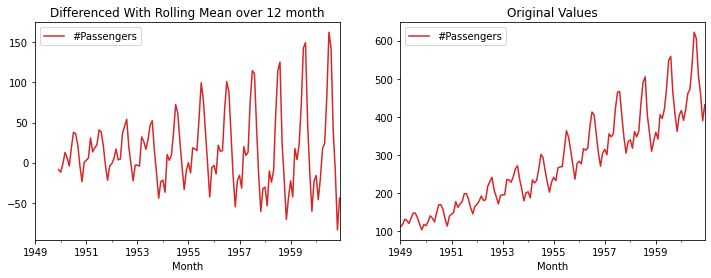

In [16]:
rolling_mean = air_passengers.rolling(window = 12).mean()
passengers_rolled_detrended = air_passengers - rolling_mean

ax1 = plt.subplot(121)
passengers_rolled_detrended.plot(figsize=(12,4),color="tab:red", title="Differenced With Rolling Mean over 12 month", ax=ax1);
ax2 = plt.subplot(122)
air_passengers.plot(figsize=(12,4), color="tab:red", title="Original Values", ax=ax2);


- we can see that we seem to have removed trend from time-series data.

- We can check whether we are successful or not by checking individual components of time-series by decomposing it as we had done above.

c:\users\malco\appdata\local\programs\python\python36\lib\site-packages\scipy\signal\signaltools.py:491: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return x[reverse].conj()


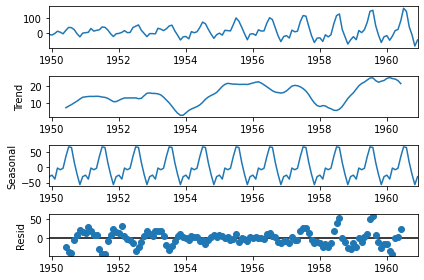

In [17]:
decompose_result = seasonal_decompose(passengers_rolled_detrended.dropna())

decompose_result.plot();

# Applying Moving Window Function on Log Transformed Time-Series


apply more than one transformation as well. We'll first apply log transformation to time-series, then take a rolling mean over a period of 12 months and then subtract rolled time-series from log-transformed time-series to get final time-series.

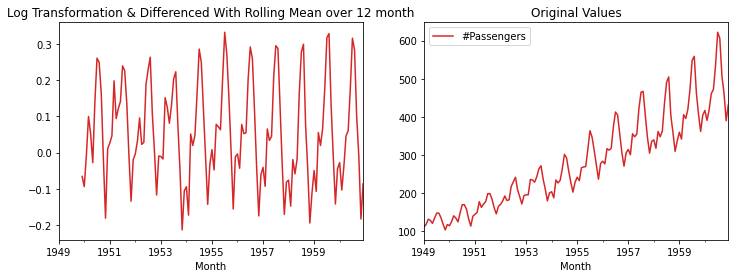

In [18]:
logged_passengers = pd.DataFrame(air_passengers["#Passengers"].apply(lambda x : np.log(x)))

rolling_mean = logged_passengers.rolling(window = 12).mean()
passengers_log_rolled_detrended = logged_passengers["#Passengers"] - rolling_mean["#Passengers"]


ax1 = plt.subplot(121)
passengers_log_rolled_detrended.plot(figsize=(12,4),color="tab:red", title="Log Transformation & Differenced With Rolling Mean over 12 month", ax=ax1);
ax2 = plt.subplot(122)
air_passengers.plot(figsize=(12,4), color="tab:red", title="Original Values", ax=ax2);


- first chart, we can see that we are able to removed the trend from time-series data.

- We can check whether we are successful or not by checking individual components of time-series by decomposing it as we had done above.

# Applying Moving Window Function on Power Transformed Time-Series¶


- apply more than one transformation as well. We'll first apply power transformation to time-series, then take a rolling mean over a period of 12 months and then subtract rolled time-series from power-transformed time-series to get final time-series.

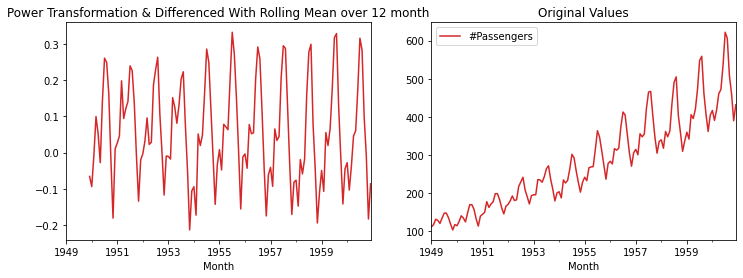

In [19]:
powered_passengers = pd.DataFrame(air_passengers["#Passengers"].apply(lambda x : np.log(x)))

rolling_mean = powered_passengers.rolling(window = 12).mean()
passengers_pow_rolled_detrended = powered_passengers["#Passengers"] - rolling_mean["#Passengers"]


ax1 = plt.subplot(121)
passengers_pow_rolled_detrended.plot(figsize=(12,4),color="tab:red", title="Power Transformation & Differenced With Rolling Mean over 12 month", ax=ax1);
ax2 = plt.subplot(122)
air_passengers.plot(figsize=(12,4), color="tab:red", title="Original Values", ax=ax2);


- above the first chart, we can see that we are able to remove the trend from time-series data.

- We can check whether we are successful or not by checking individual components of time-series by decomposing it as we had done above.

#### Applying Linear Regression to Remove Trend¶


- apply a linear regression model to remove the trend. Below we are fitting a linear regression model to our time-series data. We are then using a fit model to predict time-series values from beginning to end. We are then subtracting predicted values from original time-series to remove the trend.

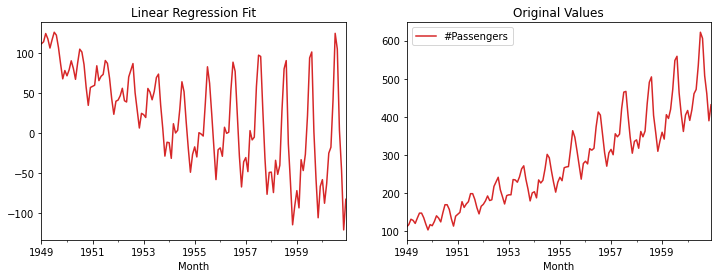

In [20]:
from statsmodels.regression.linear_model import OLS
least_squares = OLS(air_passengers["#Passengers"].values, list(range(air_passengers.shape[0])))
result = least_squares.fit()

fit = pd.Series(result.predict(list(range(air_passengers.shape[0]))), index = air_passengers.index)

passengers_ols_detrended = air_passengers["#Passengers"] - fit


ax1 = plt.subplot(121)
passengers_ols_detrended.plot(figsize=(12,4), color="tab:red", title="Linear Regression Fit", ax=ax1);
ax2 = plt.subplot(122)
air_passengers.plot(figsize=(12,4), color="tab:red", title="Original Values", ax=ax2);

- From the above the first chart, we can see that we are able to remove the trend from time-series data.

- We can check whether we are successful or not by checking individual components of time-series by decomposing it as we had done above.



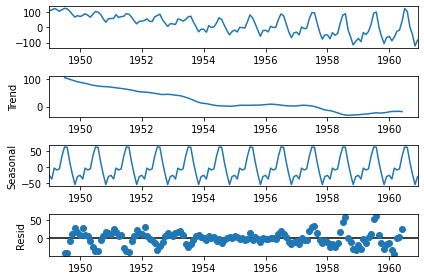

In [21]:
decompose_result = seasonal_decompose(passengers_ols_detrended.dropna())

decompose_result.plot();

### 8. Remove Seasonality
- remove seasonality by differencing technique. We'll use differencing over various de-trended time-series calculated above.

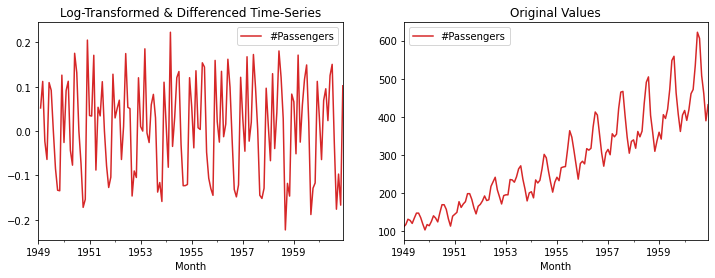

In [22]:
logged_passengers_diff = logged_passengers - logged_passengers.shift()
ax1 = plt.subplot(121)
logged_passengers_diff.plot(figsize=(12,4), color="tab:red", title="Log-Transformed & Differenced Time-Series", ax=ax1)
ax2 = plt.subplot(122)
air_passengers.plot(figsize=(12,4), color="tab:red", title="Original Values", ax=ax2);

- We can now test whether our time-series is stationary of now by applying the dicky-fuller test which we had applied above.



In [23]:
dftest = adfuller(logged_passengers_diff.dropna()["#Passengers"].values, autolag = 'AIC')

print("1. ADF : ",dftest[0])
print("2. P-Value : ", dftest[1])
print("3. Num Of Lags : ", dftest[2])
print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])
print("5. Critical Values :")
for key, val in dftest[4].items():
    print("\t",key, ": ", val)

1. ADF :  -2.717130598388135
2. P-Value :  0.07112054815085833
3. Num Of Lags :  14
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 128
5. Critical Values :
	 1% :  -3.4825006939887997
	 5% :  -2.884397984161377
	 10% :  -2.578960197753906


- From our dicky-fuller test results, we can confirm that time-series is NOT STATIONARY due to the p-value of 0.07 greater than 0.05.


### Differencing Over Power Transformed Time-Series


- We have applied differencing to power transformed time-series by shifting its value by 1 period and subtracting it from original power transformed time-series

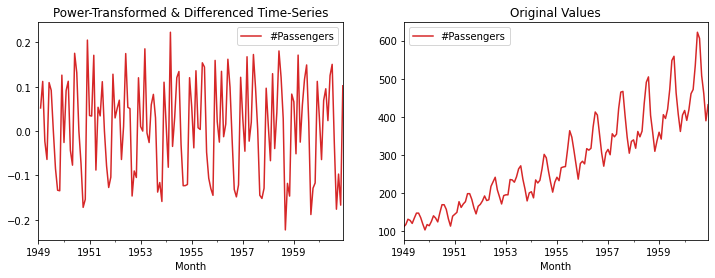

In [24]:
powered_passengers_diff = powered_passengers - powered_passengers.shift()

ax1 = plt.subplot(121)
powered_passengers_diff.plot(figsize=(12,4), color="tab:red", title="Power-Transformed & Differenced Time-Series", ax=ax1);
ax2 = plt.subplot(122)
air_passengers.plot(figsize=(12,4), color="tab:red", title="Original Values", ax=ax2);

In [25]:
# We can now test whether our time-series is stationary of now by applying the dicky-fuller test which we had applied above.
dftest = adfuller(powered_passengers_diff["#Passengers"].dropna().values, autolag = 'AIC')

print("1. ADF : ",dftest[0])
print("2. P-Value : ", dftest[1])
print("3. Num Of Lags : ", dftest[2])
print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])
print("5. Critical Values :")
for key, val in dftest[4].items():
    print("\t",key, ": ", val)

1. ADF :  -2.717130598388135
2. P-Value :  0.07112054815085833
3. Num Of Lags :  14
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 128
5. Critical Values :
	 1% :  -3.4825006939887997
	 5% :  -2.884397984161377
	 10% :  -2.578960197753906


### Differencing Over Time-Series with Rolling Mean taken over 12 Months

- We have applied differencing to mean rolled time-series by shifting its value by 1 period and subtracting it from original mean rolled time-series

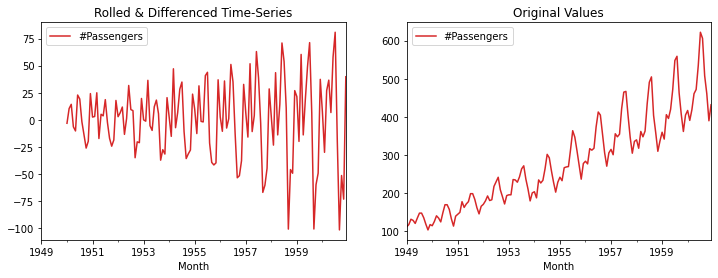

1. ADF :  -3.1544826348635486
2. P-Value :  0.022775264967860986
3. Num Of Lags :  12
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 119
5. Critical Values :
	 1% :  -3.4865346059036564
	 5% :  -2.8861509858476264
	 10% :  -2.579896092790057


In [26]:
passengers_rolled_detrended_diff = passengers_rolled_detrended - passengers_rolled_detrended.shift()

ax1 = plt.subplot(121)
passengers_rolled_detrended_diff.plot(figsize=(8,4), color="tab:red", title="Rolled & Differenced Time-Series", ax=ax1);
ax2 = plt.subplot(122)
air_passengers.plot(figsize=(12,4), color="tab:red", title="Original Values", ax=ax2);
dftest = adfuller(passengers_rolled_detrended_diff.dropna()["#Passengers"].values, autolag = 'AIC')
plt.show()
print("1. ADF : ",dftest[0])
print("2. P-Value : ", dftest[1])
print("3. Num Of Lags : ", dftest[2])
print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])
print("5. Critical Values :")
for key, val in dftest[4].items():
    print("\t",key, ": ", val)

### Differencing Over Log Transformed & Mean Rolled Time-Series¶


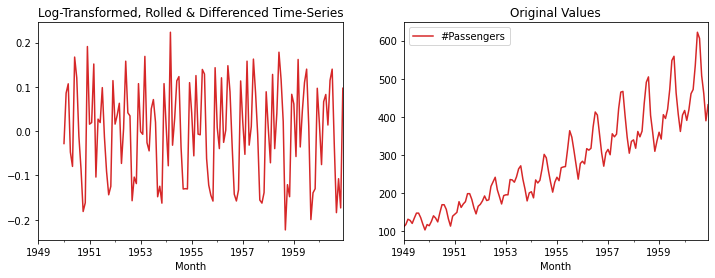

In [27]:
passengers_log_rolled_detrended_diff = passengers_log_rolled_detrended - passengers_log_rolled_detrended.shift()

ax1 = plt.subplot(121)
passengers_log_rolled_detrended_diff.plot(figsize=(8,4), color="tab:red", title="Log-Transformed, Rolled & Differenced Time-Series", ax=ax1);
ax2 = plt.subplot(122)
air_passengers.plot(figsize=(12,4), color="tab:red", title="Original Values", ax=ax2);

In [28]:
dftest = adfuller(passengers_log_rolled_detrended_diff.dropna().values, autolag = 'AIC')

print("1. ADF : ",dftest[0])
print("2. P-Value : ", dftest[1])
print("3. Num Of Lags : ", dftest[2])
print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])
print("5. Critical Values :")
for key, val in dftest[4].items():
    print("\t",key, ": ", val)

1. ADF :  -3.912981245419513
2. P-Value :  0.0019413623769364854
3. Num Of Lags :  13
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 118
5. Critical Values :
	 1% :  -3.4870216863700767
	 5% :  -2.8863625166643136
	 10% :  -2.580009026141913


- From our dicky-fuller test results, we can confirm that time-series is STATIONARY due to a p-value of 0.001 less than 0.05.



# Differencing Over Power Transformed & Mean Rolled Time-Series¶


We have applied differencing to power transformed & mean rolled time-series by shifting its value by 1 period and subtracting it from original time-series

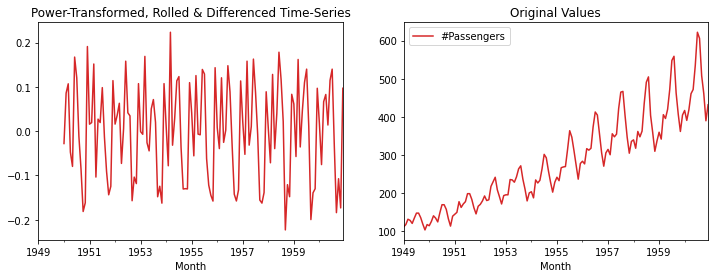

In [29]:
passengers_pow_rolled_detrended_diff = passengers_pow_rolled_detrended - passengers_pow_rolled_detrended.shift()

ax1 = plt.subplot(121)
passengers_pow_rolled_detrended_diff.plot(figsize=(8,4), color="tab:red", title="Power-Transformed, Rolled & Differenced Time-Series", ax=ax1);
ax2 = plt.subplot(122)
air_passengers.plot(figsize=(12,4), color="tab:red", title="Original Values", ax=ax2);

In [30]:
dftest = adfuller(passengers_pow_rolled_detrended_diff.dropna().values, autolag = 'AIC')

print("1. ADF : ",dftest[0])
print("2. P-Value : ", dftest[1])
print("3. Num Of Lags : ", dftest[2])
print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])
print("5. Critical Values :")
for key, val in dftest[4].items():
    print("\t",key, ": ", val)

1. ADF :  -3.912981245419513
2. P-Value :  0.0019413623769364854
3. Num Of Lags :  13
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 118
5. Critical Values :
	 1% :  -3.4870216863700767
	 5% :  -2.8863625166643136
	 10% :  -2.580009026141913


- From our dicky-fuller test results, we can confirm that time-series is STATIONARY due to a p-value of 0.001 less than 0.05.



### Differencing Over Linear Regression Transformed Time-Series¶


- We have applied differencing to linear regression transformed time-series by shifting it's value by 1 period and subtracting it from original log-transformed time-series



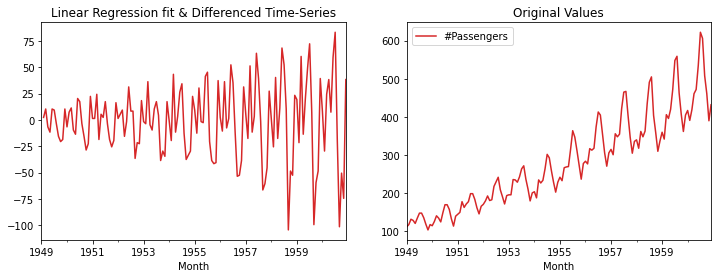

In [31]:
passengers_ols_detrended_diff = passengers_ols_detrended - passengers_ols_detrended.shift()

ax1 = plt.subplot(121)
passengers_ols_detrended_diff.plot(figsize=(8,4), color="tab:red", title="Linear Regression fit & Differenced Time-Series", ax=ax1);
ax2 = plt.subplot(122)
air_passengers.plot(figsize=(12,4), color="tab:red", title="Original Values", ax=ax2);

- We can now test whether our time-series is stationary of now by applying the dicky-fuller test which we had applied above.



In [32]:
from statsmodels.tsa.stattools import adfuller

dftest = adfuller(passengers_ols_detrended_diff.dropna().values, autolag = 'AIC')

print("1. ADF : ",dftest[0])
print("2. P-Value : ", dftest[1])
print("3. Num Of Lags : ", dftest[2])
print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])
print("5. Critical Values :")
for key, val in dftest[4].items():
    print("\t",key, ": ", val)

1. ADF :  -2.8292668241700123
2. P-Value :  0.054213290283823795
3. Num Of Lags :  12
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 130
5. Critical Values :
	 1% :  -3.4816817173418295
	 5% :  -2.8840418343195267
	 10% :  -2.578770059171598


- From our dicky-fuller test results, we can confirm that time-series is NOT STATIONARY due to the p-value of 0.054 greater than 0.05.

- This ends our small tutorial on handling the trend and seasonality with time-series data and various ways to remove them. Please feel free to let us know your views in the comments section